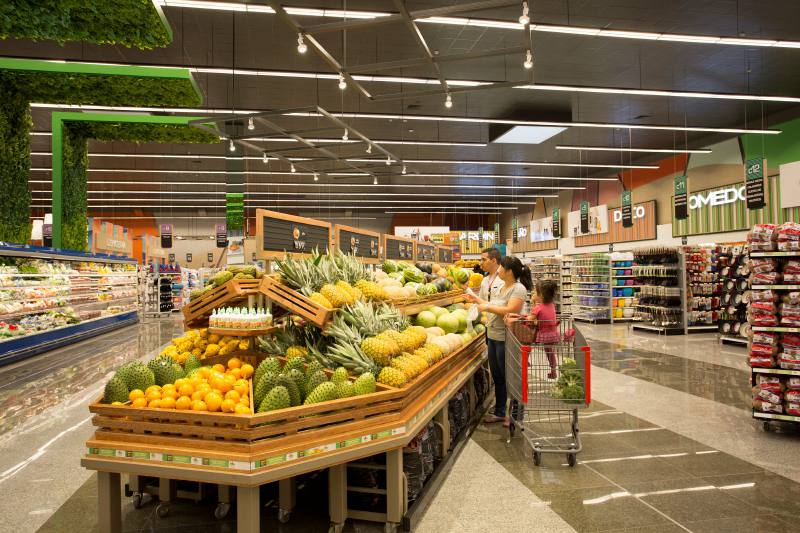

# Grocery-sales-forecasting-prediction-using-different-ml-algorithms



Dataset Link: https://www.kaggle.com/competitions/favorita-grocery-sales-forecasting/overview

# Loading the Dataset

In [1]:
# Downloading Data
!pip install opendatasets --upgrade --quiet
import opendatasets as od

In [2]:
Dataset_url = 'https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data'
od.download(Dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rachanamanish2000
Your Kaggle Key: ··········


100%|██████████| 21.4M/21.4M [00:00<00:00, 50.5MB/s]



Extracting archive ./store-sales-time-series-forecasting/store-sales-time-series-forecasting.zip to ./store-sales-time-series-forecasting


In [3]:
data_dir = './store-sales-time-series-forecasting'

#View Dataset Files

In [4]:
# List of files with size
!ls -lh {data_dir}

total 119M
-rw-r--r-- 1 root root  22K Mar  4 15:34 holidays_events.csv
-rw-r--r-- 1 root root  21K Mar  4 15:34 oil.csv
-rw-r--r-- 1 root root 335K Mar  4 15:34 sample_submission.csv
-rw-r--r-- 1 root root 1.4K Mar  4 15:34 stores.csv
-rw-r--r-- 1 root root 999K Mar  4 15:34 test.csv
-rw-r--r-- 1 root root 117M Mar  4 15:34 train.csv
-rw-r--r-- 1 root root 1.5M Mar  4 15:34 transactions.csv


In [5]:
# Training set
!head {data_dir}/train.csv

id,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0
5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,2013-01-01,1,CELEBRATION,0.0,0
7,2013-01-01,1,CLEANING,0.0,0
8,2013-01-01,1,DAIRY,0.0,0


In [6]:
# Test set
!head {data_dir}/test.csv

id,date,store_nbr,family,onpromotion
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2
3000891,2017-08-16,1,BEVERAGES,20
3000892,2017-08-16,1,BOOKS,0
3000893,2017-08-16,1,BREAD/BAKERY,12
3000894,2017-08-16,1,CELEBRATION,0
3000895,2017-08-16,1,CLEANING,25
3000896,2017-08-16,1,DAIRY,45


In [7]:
# Sample submission file
!head {data_dir}/sample_submission.csv

id,sales
3000888,0.0
3000889,0.0
3000890,0.0
3000891,0.0
3000892,0.0
3000893,0.0
3000894,0.0
3000895,0.0
3000896,0.0


In [8]:
# holiday events file
!head {data_dir}/holidays_events.csv

date,type,locale,locale_name,description,transferred
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False


In [9]:
# Stores file
!head {data_dir}/stores.csv

store_nbr,city,state,type,cluster
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
6,Quito,Pichincha,D,13
7,Quito,Pichincha,D,8
8,Quito,Pichincha,D,8
9,Quito,Pichincha,B,6


In [10]:
# Oil file 
!head {data_dir}/oil.csv

date,dcoilwtico
2013-01-01,
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.2
2013-01-08,93.21
2013-01-09,93.08
2013-01-10,93.81
2013-01-11,93.6


In [11]:
# Transaction File
!head {data_dir}/transactions.csv

date,store_nbr,transactions
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922
2013-01-02,5,1903
2013-01-02,6,2143
2013-01-02,7,1874
2013-01-02,8,3250


In [12]:
# No. of lines in training set
!wc -l {data_dir}/train.csv

3000889 ./store-sales-time-series-forecasting/train.csv


In [13]:
# No. of lines in test set
!wc -l {data_dir}/test.csv

28513 ./store-sales-time-series-forecasting/test.csv


In [14]:
# No. of lines in submission file
!wc -l {data_dir}/sample_submission.csv

28513 ./store-sales-time-series-forecasting/sample_submission.csv


In [15]:
import numpy as np # TO perform Numerical Operations

In [16]:
import pandas as pd # To perform operations into the dataframe

In [17]:
# Reading the Files

train_df = pd.read_csv('./store-sales-time-series-forecasting/train.csv')
test_df = pd.read_csv('./store-sales-time-series-forecasting/test.csv')
stores_df = pd.read_csv('./store-sales-time-series-forecasting/stores.csv')
holidays_df = pd.read_csv('./store-sales-time-series-forecasting/holidays_events.csv')
transactions_df = pd.read_csv('./store-sales-time-series-forecasting/transactions.csv')
oil_df = pd.read_csv('./store-sales-time-series-forecasting/oil.csv')
sample_sub_df = pd.read_csv('./store-sales-time-series-forecasting/sample_submission.csv')

In [18]:
train_df.shape, train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


((3000888, 6), None)

In [19]:
test_df.shape, test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


((28512, 5), None)

# Data Cleaning

In [20]:
train_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [21]:
train_df.duplicated().sum()

0

In [22]:
test_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [23]:
test_df.duplicated().sum()

0

In [24]:
stores_df.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [25]:
stores_df.duplicated().sum()

0

In [26]:
holidays_df.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [27]:
holidays_df.duplicated().sum()


0

In [28]:
transactions_df.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [29]:
transactions_df.duplicated().sum()

0

In [30]:
oil_df.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [31]:
oil_df.duplicated().sum()

0

As we can see our dataframe does not contains any duplicate or null values except the oil file, so let's deal with the oil file to remove the null values.

In [32]:
oil_df

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [33]:
oil_df.isna().value_counts()

date   dcoilwtico
False  False         1175
       True            43
dtype: int64

In [34]:
oil_df["dcoilwtico"].fillna(method ='bfill', inplace = True)

In [35]:
oil_df

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


as there are very less number of missing values we are going to fill all the null values with the next value.

# Data Manipulation

In [36]:
train_df['date'] = pd.to_datetime(train_df["date"])
test_df['date'] = pd.to_datetime(test_df["date"])
transactions_df['date'] = pd.to_datetime(transactions_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])
holidays_df['date'] = pd.to_datetime(holidays_df['date'])

In [37]:
holidays_df.rename(columns = {'locale_name':'city', 'type':'day_type'},inplace = True)
holidays_df.drop('description',axis = 1,inplace = True)

In [38]:
train_df = pd.merge(train_df, stores_df, on = 'store_nbr', how = 'left')
train_df = pd.merge(train_df, oil_df, on = 'date', how='left')
train_df = pd.merge(train_df, holidays_df, on = ['date', 'city'], how = 'left')
test_df = pd.merge(test_df, stores_df, on = 'store_nbr', how = 'left')
test_df = pd.merge(test_df, oil_df, on = 'date', how = 'left')
test_df = pd.merge(test_df, holidays_df, on = ['date', 'city'], how = 'left')

In [39]:
train_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,day_type,locale,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,93.14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001147,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,NaN,NaN,NaN
3001148,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,NaN,NaN,NaN
3001149,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,NaN,NaN,NaN
3001150,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,NaN,NaN,NaN


In [40]:
test_df

,id,date,store_nbr,family,onpromotion,city,state,type,cluster,dcoilwtico,day_type,locale,transferred
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,46.80,NaN,NaN,NaN
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,46.80,NaN,NaN,NaN
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,46.80,NaN,NaN,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,46.80,NaN,NaN,NaN
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,46.80,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN
28508,3029396,2017-08-31,9,PREPARED FOODS,0,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN
28509,3029397,2017-08-31,9,PRODUCE,1,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,Quito,Pichincha,B,6,47.26,NaN,NaN,NaN


Now we will check for the null value in the final training and test set.

In [41]:
train_df.isna().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type                 0
cluster              0
dcoilwtico      857406
day_type       2988645
locale         2988645
transferred    2988645
dtype: int64

let's see deal with these null values.

In [42]:
train_df.day_type.value_counts()

Holiday       8448
Additional    3696
Transfer       363
Name: day_type, dtype: int64

As we can see apart from the holidays all are working days so we will fill `working_day` at the place of `nan` in day_type

In [43]:
train_df['day_type'].fillna('working_day', inplace = True)

we will also fill the other nan values.

In [44]:
# Filling the nan values by the value before nan for `dcoilwtico` column

train_df['dcoilwtico'].fillna(method = 'ffill',inplace = True)

In [45]:
# All the values in the locale column are working days so we will fill National their.
train_df.locale.value_counts(),
train_df['locale'].fillna('National', inplace=True)
train_df['locale'].isna().sum()

0

In [46]:
train_df.transferred.value_counts()

False    12144
True       363
Name: transferred, dtype: int64

In [47]:
# All the nan values are working days so we will fill False as it will be 'Not Transferred'
train_df['transferred'].fillna(False, inplace = True)

In [48]:
train_df.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
city           0
state          0
type           0
cluster        0
dcoilwtico     0
day_type       0
locale         0
transferred    0
dtype: int64

As we can see there is no null values left in the training set now we will try to fill null values for test set.

In [49]:
test_df.isna().sum()

id                 0
date               0
store_nbr          0
family             0
onpromotion        0
city               0
state              0
type               0
cluster            0
dcoilwtico      7128
day_type       28446
locale         28446
transferred    28446
dtype: int64

In [50]:
# As we can see apart from the holidays all are working days so we will fill working_day at the place of nan in day_type
 
test_df['day_type'].fillna('working_day',inplace=True)

In [51]:
# Filling the nan values by the value before nan for `dcoilwtico` column

test_df['dcoilwtico'].fillna(method = 'ffill', inplace=True)

In [52]:
# All the values in the locale column are working days so we will fill National their.

test_df['locale'].fillna('National', inplace=True)

In [53]:
# All the nan values are working days so we will fill False as it will be 'Not Transferred'

test_df['transferred'].fillna(False, inplace=True)

In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3001152 entries, 0 to 3001151
Data columns (total 14 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   city         object        
 7   state        object        
 8   type         object        
 9   cluster      int64         
 10  dcoilwtico   float64       
 11  day_type     object        
 12  locale       object        
 13  transferred  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 323.4+ MB


In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   city         28512 non-null  object        
 6   state        28512 non-null  object        
 7   type         28512 non-null  object        
 8   cluster      28512 non-null  int64         
 9   dcoilwtico   28512 non-null  float64       
 10  day_type     28512 non-null  object        
 11  locale       28512 non-null  object        
 12  transferred  28512 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 2.9+ MB


As `train_df` and `test_df` are acquiring higher memory then rquired so we are going to change the datatypes for these. 

In [56]:
# For Training set

dtypes = {
    'store_nbr' : 'uint8',
    'sales' : 'float64',
    'onpromotion' : 'uint16',
    'cluster' : 'uint8',
    'dcoilwtico' : 'float64',
    'transferred' : 'uint8'
}

In [57]:
train_df = train_df.astype(dtypes)

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3001152 entries, 0 to 3001151
Data columns (total 14 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    uint8         
 3   family       object        
 4   sales        float64       
 5   onpromotion  uint16        
 6   city         object        
 7   state        object        
 8   type         object        
 9   cluster      uint8         
 10  dcoilwtico   float64       
 11  day_type     object        
 12  locale       object        
 13  transferred  uint8         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6), uint16(1), uint8(3)
memory usage: 266.2+ MB


In [59]:
# For test set

dtype = {
    'store_nbr' : 'uint8',
    'onpromotion' : 'uint16',
    'cluster' : 'uint8',
    'dcoilwtico' : 'float64',
    'transferred' : 'uint8'
}



In [60]:
test_df = test_df.astype(dtype)

In [61]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  uint8         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  uint16        
 5   city         28512 non-null  object        
 6   state        28512 non-null  object        
 7   type         28512 non-null  object        
 8   cluster      28512 non-null  uint8         
 9   dcoilwtico   28512 non-null  float64       
 10  day_type     28512 non-null  object        
 11  locale       28512 non-null  object        
 12  transferred  28512 non-null  uint8         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6), uint16(1), uint8(3)
memory usage: 2.3+ MB


In [62]:
train_df.shape, test_df.shape

((3001152, 14), (28512, 13))

This is what we get after cleaning and manipulating the datasets.
- 3M+ rows with 14 columns for training set.

- 28K+ rows with 13 columns for test set


# Exploratory Data Analysis

#### let's install and import some of the visualization libraries.

In [63]:
!pip install seaborn plotly --upgrade --quiet
!pip install matplotlib==3.1.3 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 57.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.10.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.1.3 which is incompatible.


In [64]:
# Visualisation libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go
%matplotlib inline

In [65]:
train_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,day_type,locale,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,93.14,working_day,National,0
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,93.14,working_day,National,0
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,93.14,working_day,National,0
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,93.14,working_day,National,0
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,93.14,working_day,National,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001147,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,working_day,National,0
3001148,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,working_day,National,0
3001149,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,working_day,National,0
3001150,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,working_day,National,0


1. Correlations

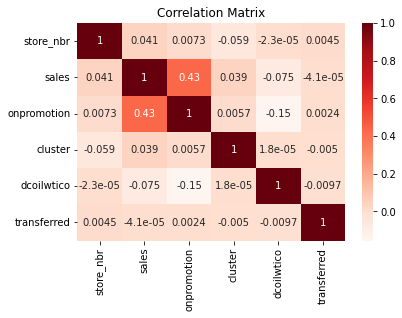

In [66]:
# We can see the Correlation between the columns of the dataframe

sns.heatmap(train_df[train_df.columns[1:]].corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

2. Top 10 selling Products

In [67]:
top_ten_selling_product = train_df.groupby('family').agg({'sales':'mean'}).sort_values(by='sales',ascending=False)[:10]
top_ten_selling_product

,sales
family,
GROCERY I,3776.889371
BEVERAGES,2385.782218
PRODUCE,1349.361737
CLEANING,1072.384006
DAIRY,709.149224
BREAD/BAKERY,463.337125
POULTRY,350.522698
MEATS,341.836694
PERSONAL CARE,270.426185


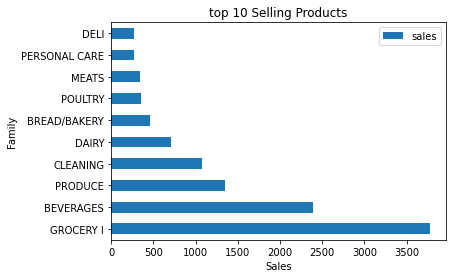

In [68]:
top_ten_selling_product.plot(kind = 'barh'); 
plt.title('top 10 Selling Products');
plt.xlabel('Sales')
plt.ylabel('Family');

3. Average Sales Distribution with respect to store type.

In [69]:
Sales_wrt_store_type = train_df.groupby([train_df.date.dt.year, "type"]).agg({"sales":"mean"}).sort_values('type', ascending=True).reset_index()
Sales_wrt_store_type

,date,type,sales
0,2013,A,434.943710
1,2017,A,946.744412
2,2014,A,670.254223
3,2016,A,847.924249
4,2015,A,719.714064
5,2013,B,192.446417
6,2017,B,458.850283
7,2014,B,264.541967
8,2016,B,419.000878
9,2015,B,348.290331


In [70]:
fig = px.box(Sales_wrt_store_type, y="sales", facet_col="type",
             color= 'type',
             boxmode="overlay", points='all')

fig.layout.update({'width':700,'height':500})
fig.update_layout(title = "Average Sales Distribution")
fig.update_layout(title_x=0.3)
fig.show()

4. Year Wise Sales Distribution

In [71]:
train_df['year']=train_df['date'].dt.year
train_df['month']=train_df['date'].dt.month

In [72]:
Avg_year_sale = train_df.groupby(['year']).agg({'sales':'mean'}).sort_values('year',ascending = False).reset_index()
Avg_year_sale

,year,sales
0,2017,480.124466
1,2016,443.733442
2,2015,371.357193
3,2014,322.939786
4,2013,216.479530


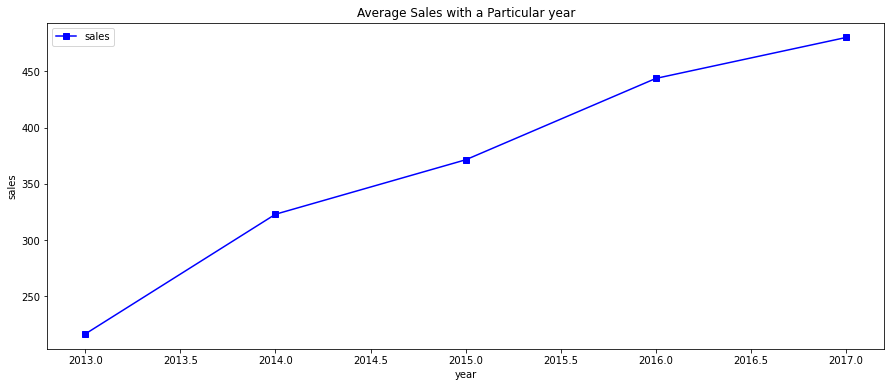

In [73]:
plt.figure(figsize=(15, 6))
plt.plot(Avg_year_sale['year'],Avg_year_sale['sales'],'s-b')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('Average Sales with a Particular year')
plt.legend(['sales']);

# Feature Engineering

In [74]:
def create_date_features(df):
    df['WeekofYear'] = (df['date'].dt.isocalendar().week)
    df['Year'] = df['date'].dt.year
    df['Day'] = df['date'].dt.day
    df['Month'] = df['date'].dt.month
    df['day_of_month'] = df.date.dt.day
    df['day_of_year'] = df.date.dt.dayofyear
    df['day_of_week'] = df.date.dt.dayofweek

    df['WeekofYear']= df['WeekofYear'].astype('uint8')
    df['Month'] = df['Month'].astype('uint8')
    df['Year'] = df['Year'].astype('uint16')
    df['Day'] = df['Day'].astype('uint8')
    df['day_of_month'] = df['day_of_month'].astype('uint16')
    df['day_of_year'] = df['day_of_year'].astype('uint16')
    df['day_of_week'] = df['day_of_week'].astype('uint16')         
    return df

In [75]:
train_df = create_date_features(train_df)
test_df = create_date_features(test_df)

In [76]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            28512 non-null  int64         
 1   date          28512 non-null  datetime64[ns]
 2   store_nbr     28512 non-null  uint8         
 3   family        28512 non-null  object        
 4   onpromotion   28512 non-null  uint16        
 5   city          28512 non-null  object        
 6   state         28512 non-null  object        
 7   type          28512 non-null  object        
 8   cluster       28512 non-null  uint8         
 9   dcoilwtico    28512 non-null  float64       
 10  day_type      28512 non-null  object        
 11  locale        28512 non-null  object        
 12  transferred   28512 non-null  uint8         
 13  WeekofYear    28512 non-null  uint8         
 14  Year          28512 non-null  uint16        
 15  Day           28512 non-null  uint8 

In [77]:
# Droping the duplicate columns

train_df.drop(['year'], axis=1,inplace = True)
train_df.drop(['month'], axis=1,inplace = True)

# Scaling and One Hot Encoding

In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3001152 entries, 0 to 3001151
Data columns (total 21 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     uint8         
 3   family        object        
 4   sales         float64       
 5   onpromotion   uint16        
 6   city          object        
 7   state         object        
 8   type          object        
 9   cluster       uint8         
 10  dcoilwtico    float64       
 11  day_type      object        
 12  locale        object        
 13  transferred   uint8         
 14  WeekofYear    uint8         
 15  Year          uint16        
 16  Day           uint8         
 17  Month         uint8         
 18  day_of_month  uint16        
 19  day_of_year   uint16        
 20  day_of_week   uint16        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6), uint16(5), uint8(6)
memory usage: 297.7+ MB


In [79]:
input_cols = ['family', 'onpromotion', 'city', 'state', 'type', 'cluster', 'dcoilwtico', 'day_type', 'locale']

target_col = 'sales'

In [80]:
input_df = train_df.copy()
target_df = train_df[target_col].copy()

test_inputs_df = test_df.copy()

Let's also identify the numeric and categirical columns

In [81]:
# Numeric And Categorical Columns

numeric_cols = input_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = input_df[input_cols].select_dtypes(include='object').columns.tolist()

In [82]:
# Scaling Numeric Columns

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

scaler = MinMaxScaler().fit(input_df[numeric_cols])

input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
test_inputs_df[numeric_cols]  = scaler.transform(test_inputs_df[numeric_cols])


In [83]:
# One hot encoding for categorical columns 

encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore').fit(input_df[categorical_cols])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [84]:
input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
input_df[encoded_cols] = input_df[encoded_cols].astype('uint8')

test_inputs_df[encoded_cols] = encoder.transform(test_inputs_df[categorical_cols])
test_inputs_df[encoded_cols] = test_inputs_df[encoded_cols].astype('uint8')

Let's Create train and Validation Datasets.

In [85]:
# Non scaling columns
date = ['WeekofYear','Month','Year','Day','day_of_month','day_of_year','day_of_week', ]
store_nbr = ['store_nbr'] # we can only concatenate list so we need to assign this as a list
transferred = ['transferred']

In [86]:
# Creating training and Validation sets 

from sklearn.model_selection import train_test_split

train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    input_df[date + store_nbr + transferred + numeric_cols + encoded_cols], 
    target_df, test_size=0.10, random_state=42)

Here we have 90% of the Training set and 10% of validation set



```
# This is formatted as code
```

# Evaluation Metric
Once we have identified the type of problem we're solving, we need to pick an appropriate evaluation metric. Also, depending on the kind of model we train, the model will also use a loss/cost function to optimize during the training process.

- Evaluation metrics used by humans to evaluate the ML model

- Generally we use 4 types of Evaluation metrics

**1. RMSE (Root Mean Squared Error)**

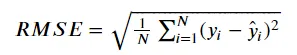

- RMSE has solutions equivalent to the solutions of maximum likelihood method when assuming the errors are normally distributed. Therefore, favorable when the distribution of y is normal around some base structure.

- RMSE is sensitive to outliers. Therefore, clipping or removing the outliers in advance is important.

**2.** **RMSLE (Root Mean Squared Logarithmic Error)** 

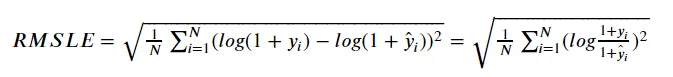


where:

 $n$ is the total number of instances,

 $\hat{y}_i$ is the predicted value of the target for instance (i),

 ${y}_i$ is the actual value of the target for instance (i)
 
 $log$ is the natural logarithm.


- RMSLE is used when y has long tail distribution, or we are interested in the ratio of true value and predicted value.

- 1 is added to avoid divergence when y is zero.

**3 — MAE (Mean Absolute Error)**

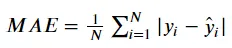

-  Robust to outliers compared to RMSE.

-  Not second-order differentiable at true y = predicted y. Therefore, some algorithms such as xgboost does not allow MAE as loss function.

-  Instead of MAE, the approximated functions such as “Fair function” or “Pseudo-Huber function” may be usable.

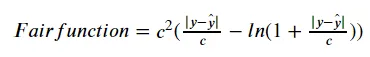


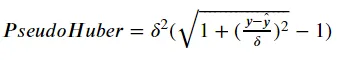

**4 — R-Squared (R²)**

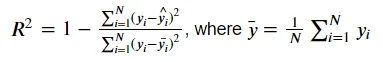


- 0≤R²≤1 (commonly but some worst cases you will see negative values) and higher R² is better, which means the prediction is closer to the data.

- Denominator does not depend on the prediction and fixed once the data is set. Therefore, maximizing R² is equivalent to minimizing the RMSE.

In [87]:
#Helper function for evaluation metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
pd.options.display.float_format = '{:,.2f}'.format

def eval_metrics(targets,prediction):
  rmse = round(mean_squared_error(targets,prediction,squared = False),3)
  rmsle = round(mean_squared_log_error(targets,prediction,squared = False),3)
  return {'RMSE': rmse}, {'RMSLE': rmsle}

# Machine Learning Models

In [88]:
!pip install xgboost scikit-learn --upgrade --quiet

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor 
import xgboost as xgb


### Linear Regression

In [90]:
%%time 

linear_model = LinearRegression()
linear_model.fit(train_inputs, train_targets)

CPU times: user 53.2 s, sys: 9.12 s, total: 1min 2s
Wall time: 1min 13s


LinearRegression()

In [91]:
linear_model_train_preds = linear_model.predict(train_inputs)
linear_model_val_preds = linear_model.predict(val_inputs)
linear_model_train_preds[linear_model_train_preds<0] = 0
linear_model_val_preds[linear_model_val_preds<0] = 0

In [92]:
print("train_error", eval_metrics(train_targets, linear_model_train_preds))
print("val_error", eval_metrics(val_targets, linear_model_val_preds))



train_error ({'RMSE': 714.527}, {'RMSLE': 2.43})
val_error ({'RMSE': 704.913}, {'RMSLE': 2.425})


AS the model performed very poor and is underfitting because there is no linearty in the data.

In [93]:
# From here we are going to Proceed with Root mean Squared error
def eval_metrics(targets,prediction):
  rmsle = round(mean_squared_log_error(targets,prediction,squared = False),3)
  return {'RMSLE': rmsle}

### Ridge Regressor

In [94]:
%%time
from sklearn.linear_model import Ridge
rigde_model = Ridge()
rigde_model.fit(train_inputs, train_targets)

CPU times: user 4.13 s, sys: 1.42 s, total: 5.55 s
Wall time: 5.93 s


Ridge()

In [95]:
ridge_train_preds = rigde_model.predict(train_inputs)
ridge_val_preds = rigde_model.predict(val_inputs)
ridge_train_preds[ridge_train_preds<0]=0
ridge_val_preds[ridge_val_preds<0]=0

In [96]:
print("train_error", eval_metrics(train_targets, ridge_train_preds))
print("val_error", eval_metrics(val_targets, ridge_val_preds))

train_error {'RMSLE': 2.43}
val_error {'RMSLE': 2.425}


### XGBRegressor

In [97]:
%%time
XGBRegressor_model = XGBRegressor(n_estimators = 8, max_depth = 5, max_leaves=3, n_jobs = -1,random_state = 42)

XGBRegressor_model.fit(train_inputs, train_targets)

CPU times: user 3min 50s, sys: 3.29 s, total: 3min 53s
Wall time: 3min 10s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=8, n_jobs=-1, num_parallel_tree=None, predictor=None,
             random_state=42, ...)

In [98]:
xgb_training_preds = XGBRegressor_model.predict(train_inputs)
xgb_validation_preds = XGBRegressor_model.predict(val_inputs)
xgb_training_preds[xgb_training_preds<0]=0
xgb_validation_preds[xgb_validation_preds<0]=0

In [99]:
print("train_error", eval_metrics(train_targets, xgb_training_preds))
print("val_error", eval_metrics(val_targets, xgb_validation_preds))

train_error {'RMSLE': 2.683}
val_error {'RMSLE': 2.68}


### Decision Tree Regressor

In [100]:
%%time
decision_tree_model= DecisionTreeRegressor(max_depth=40, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)
decision_tree_model.fit(train_inputs, train_targets)

CPU times: user 2min 20s, sys: 1.74 s, total: 2min 21s
Wall time: 2min 23s


DecisionTreeRegressor(max_depth=40, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

In [101]:
decision_training_prediction = decision_tree_model.predict(train_inputs)
decision_validation_prediction = decision_tree_model.predict(val_inputs)

In [102]:
print("train_error", eval_metrics(train_targets, decision_training_prediction))
print("val_error", eval_metrics(val_targets, decision_validation_prediction))

train_error {'RMSLE': 0.309}
val_error {'RMSLE': 0.476}


After Performing several experiments we have increased our scores, and getting the model to predict the sales better.

# Conclusion 

- we have seen the worst and the best models by performing some experiments.

- XGBRegressor gives us the best score on training and validation set as 0.309 and 0.476 respectively.

# Summary

This project dataset has 30M+ reocrds. Changed the datatypes of each column to reduce size of the file.

As expected the linear models didn't perform well on the other hand DecisionTree remembered the training data as it is, after tuning the results imporved a little bit. 

Date Features also had an impact on predicting sales.

XGBRegressor is the best fit model for our training set.

# Future work

- Still we need to perform many experiments on the dataset.

- Check the compitibility of the Dataset on test set

- Get higher Score on the Kaggle leaderBoard

- Need to perofrm Exponential Moving Average

- Will work on Unsupurvised Machine Learning problems.

- Work on Deep learning and NLP projects.

- Can extract features from the target variable such as aggregrate, rolling stats since we have time-series data.

#References

**Documentaion**

[1]. [Scikit Learn Supervised Learning](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)  

[2]. [XGBoost](https://xgboost.readthedocs.io/en/latest/)

[3]. [RMSLE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html)

**Tutorials**

[4]. How to approach Machine Learning Problems 
[Jovian Aakash N S](https://jovian.ai/learn/zero-to-data-analyst-bootcamp)

**Queries**

[5]. StackOverflow, GeekforGeeks
